# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_mouse_data = pd.merge(study_results,mouse_metadata, how='left', on=["Mouse ID","Mouse ID"])

# Display the data table for preview
study_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
study_mouse_data['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = study_mouse_data[study_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

duplicate_mice = duplicate_rows['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = study_mouse_data[study_mouse_data['Mouse ID'].isin(duplicate_mice)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study_mouse_data = study_mouse_data[study_mouse_data['Mouse ID'].isin(duplicate_mice)==False]
cleaned_study_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_study_mouse_data['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_mouse_mean = cleaned_study_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
sum_mouse_median = cleaned_study_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
sum_mouse_variance = cleaned_study_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sum_mouse_std = cleaned_study_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sum_mouse_sem= cleaned_study_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
                "Mean Tumor Volume": sum_mouse_mean,
                "Median Tumor Volume": sum_mouse_median,
                "Tumor Volume Variance": sum_mouse_variance,
                "Tumor Volume Std. Dev.":sum_mouse_std,
                "Tumor Volume Std. Err.": sum_mouse_sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = cleaned_study_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Std_Dev='std',
    SEM='sem'
)

summary_df

,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

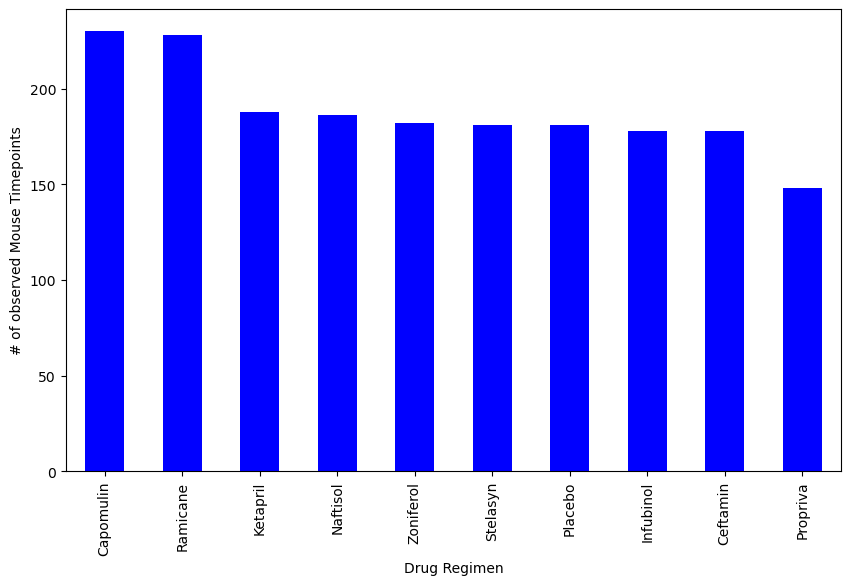

<Figure size 640x480 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_study_mouse_data['Drug Regimen'].value_counts()
regimen_counts.plot(kind='bar', figsize=(10, 6), color='royalblue')

plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.show()
plt.tight_layout()

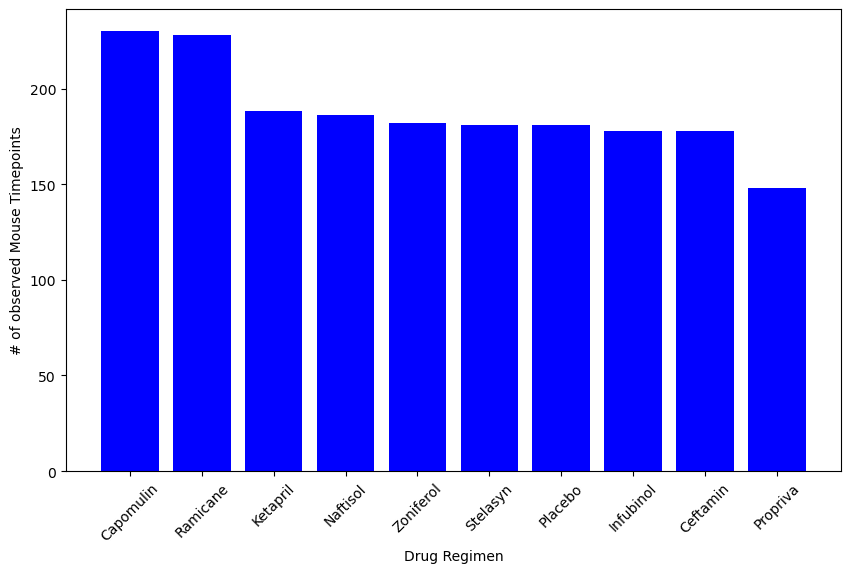

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values, color='royalblue')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.show()
plt.tight_layout()

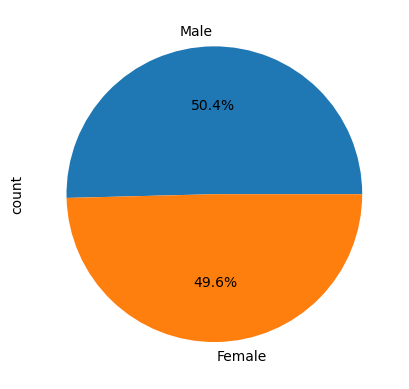

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = cleaned_study_mouse_data[['Mouse ID', 'Sex']].drop_duplicates()['Sex'].value_counts()

# Get the unique mice with their gender
Sex= ["Femail", "Male"]
gender_counts.plot(kind='pie', autopct='%1.1f%%', ylabel="count")


# Make the pie chart
# plt.axis("equal")
plt.show()

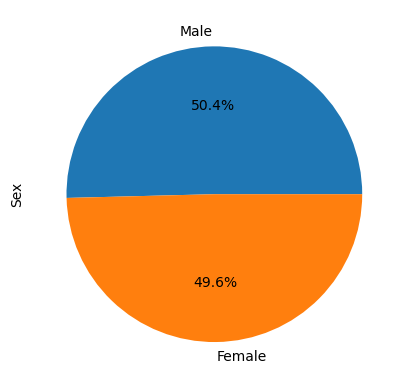

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender_counts = cleaned_study_mouse_data[['Mouse ID', 'Sex']].drop_duplicates()['Sex'].value_counts()
# Get the unique mice with their gender
plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%')

# Make the pie chart
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
regements_name = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

regements_name_data = cleaned_study_mouse_data[cleaned_study_mouse_data['Drug Regimen'].isin(regements_name)]
regements_name_data
# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = regements_name_data.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(max_timepoints, cleaned_study_mouse_data, on=['Mouse ID', 'Timepoint'], how='left')

merged_data= merged_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
merged_data.head()



,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds


# drug_regimens = merged_data['Drug Regimen'].unique()
drug_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
outliers_list = []

for reg in drug_regimens:
    reg_data = merged_data.loc[merged_data['Drug Regimen'] == reg]['Tumor Volume (mm3)']
    quartiles = reg_data.quantile([.25, .5, .75])
    quart_first= quartiles[0.25]
    quart_last = quartiles[0.75]

    quart_range = quart_last - quart_first
    lower_bound = quart_first - (1.5 *  quart_range)
    upper_bound = quart_last + (1.5 *  quart_range)
    # print(f'Lower Bound for {reg}: {lower_bound}')
    # print(f'Upper Bound for {reg}: {upper_bound}')
    outliers = reg_data.loc[(reg_data < lower_bound) | (reg_data > upper_bound)]
    outliers_list.append(outliers)
    print(f"{reg}'s potential outliers: {outliers}")


    # print(f'Number of {reg} outliers: {outliers}')




Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


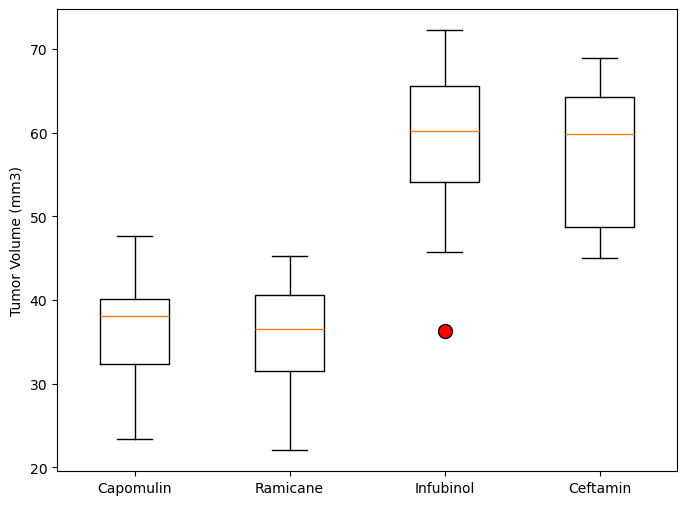

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(8, 6))
red_dot = dict(markerfacecolor = "red", markersize=10)
plt.boxplot([merged_data[merged_data["Drug Regimen"] == reg]["Tumor Volume (mm3)"] for reg in drug_regimens], flierprops= red_dot,
            labels=drug_regimens,)


plt.ylabel("Tumor Volume (mm3)")
plt.xticks()
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

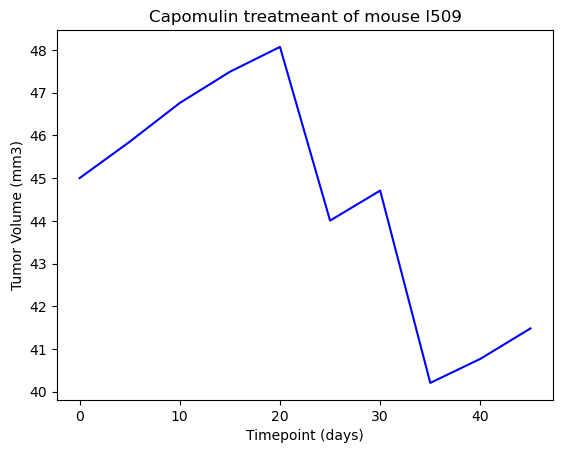

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_mouse = cleaned_study_mouse_data.loc[cleaned_study_mouse_data["Drug Regimen"] == "Capomulin"]
forline_df = capo_mouse.loc[capo_mouse["Mouse ID"] == "l509"]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumsiz,color="blue")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show


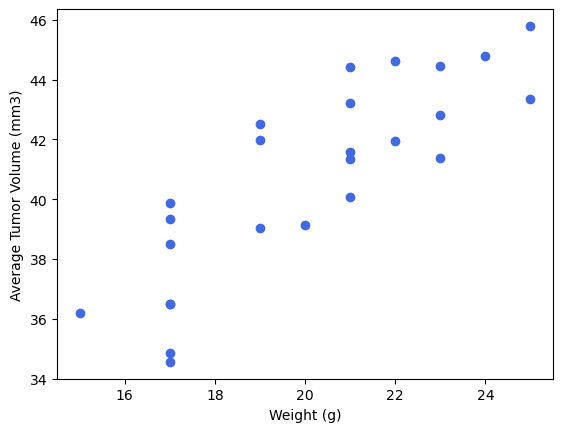

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capo_mouse = cleaned_study_mouse_data[cleaned_study_mouse_data["Drug Regimen"] == "Capomulin"]

# Convert relevant columns to numeric using .loc to avoid SettingWithCopyWarning
capo_mouse.loc[:, 'Weight (g)'] = pd.to_numeric(capo_mouse['Weight (g)'], errors='coerce')
capo_mouse.loc[:, 'Tumor Volume (mm3)'] = pd.to_numeric(capo_mouse['Tumor Volume (mm3)'], errors='coerce')

# Group by 'Mouse ID' and calculate the average tumor volume for each mouse weight
avg_volume = capo_mouse.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()


fig1, ax1 = plt.subplots()
ax1.scatter(avg_volume['Weight (g)'], avg_volume['Tumor Volume (mm3)'], color="royalblue")


ax1.set_xlabel('Weight (g)')
ax1.set_ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()

## Correlation and Regression

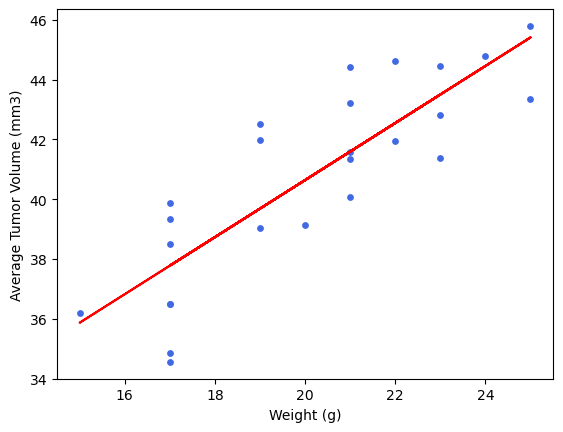

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation = st.pearsonr(avg_volume['Weight (g)'], avg_volume['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_volume['Weight (g)'], avg_volume['Tumor Volume (mm3)'])

# Create regression line values
regress_values = avg_volume['Weight (g)'] * slope + intercept
# Generate the scatter plot
fig1, ax1 = plt.subplots()
ax1.scatter(avg_volume['Weight (g)'], avg_volume['Tumor Volume (mm3)'], color="royalblue", s=15)

# Plot the regression line
ax1.plot(avg_volume['Weight (g)'], regress_values, color="red")

ax1.set_xlabel('Weight (g)')
ax1.set_ylabel('Average Tumor Volume (mm3)')

plt.show()
